In [3]:
# Import Essentials Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Explanatory Data Analysis (EDA)

In [4]:
data_frame = pd.read_csv('../assets/data/raw_analyst_ratings.csv')
data_frame.head(20)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [5]:
# Drop the first column (Unnamed: 0)
data_frame.drop('Unnamed: 0',axis=1,inplace=True)
# Print Info about the data_frame
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [6]:

# Check if there is a missing data
data_frame.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [7]:
# Calculate the length of each headline and store it in a new column 'headline_length'
data_frame['headline_length'] = data_frame['headline'].apply(len)

# Display the first few rows to verify the new column
print(data_frame[['headline', 'headline_length']].head())

                                            headline  headline_length
0            Stocks That Hit 52-Week Highs On Friday               39
1         Stocks That Hit 52-Week Highs On Wednesday               42
2                      71 Biggest Movers From Friday               29
3       46 Stocks Moving In Friday's Mid-Day Session               44
4  B of A Securities Maintains Neutral on Agilent...               87


In [8]:
# Perform descriptive statistics on the 'headline_length' column
headline_length_stats = data_frame['headline_length'].describe().T

headline_length_stats

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [9]:
# Count the number of articles per publisher
publisher_counts = data_frame['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


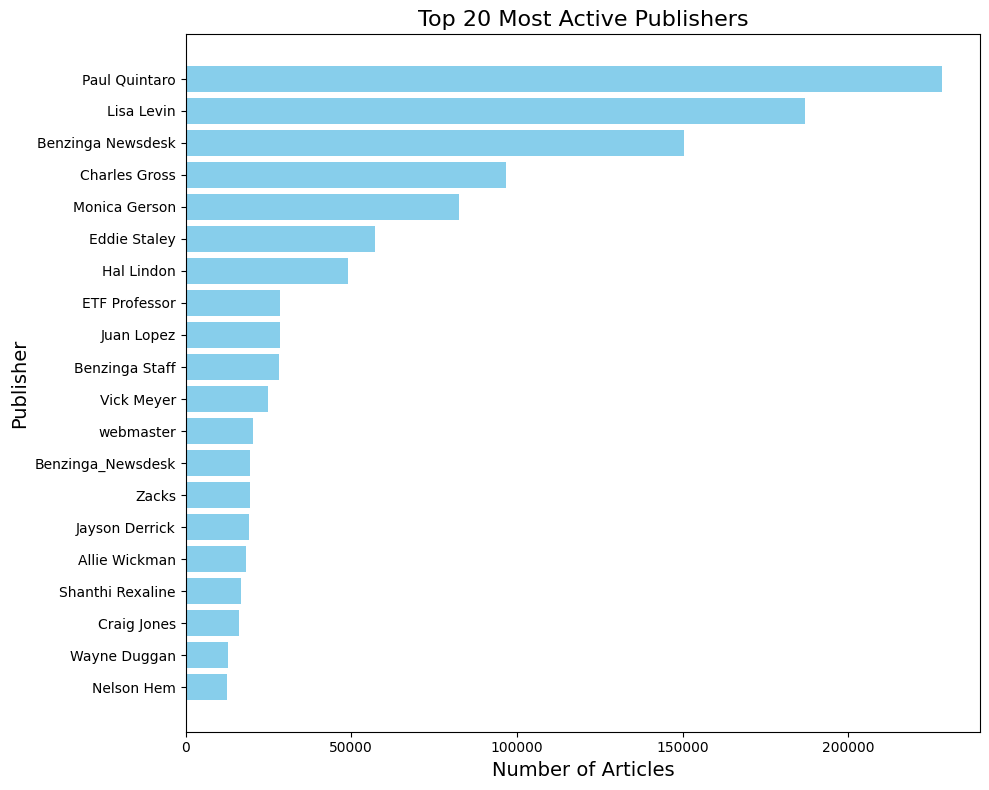

In [10]:
# Visualize the top publishers
# Plot the top 20 publishers using a horizontal bar chart
top_publishers = publisher_counts.head(20)
plt.figure(figsize=(10, 8))  # Adjust the figure size
plt.barh(top_publishers.index, top_publishers.values, color='skyblue')  # Horizontal bar chart
plt.title('Top 20 Most Active Publishers', fontsize=16)
plt.xlabel('Number of Articles', fontsize=14)
plt.ylabel('Publisher', fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis so the top publisher appears at the top
plt.tight_layout()
plt.show()


C:\Users\Surafel Destaw\AppData\Local\Temp\ipykernel_6604\891057392.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_frame['date'] = pd.to_datetime(data_frame['date'], errors='coerce', infer_datetime_format=True)


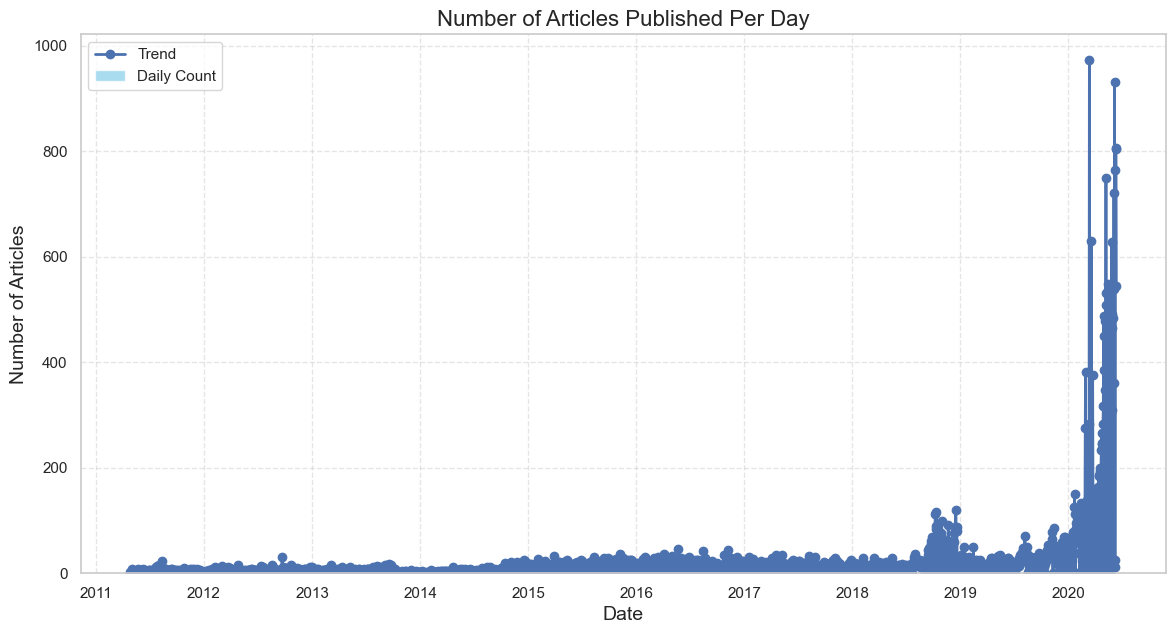

In [11]:
# Apply Seaborn styling for a more appealing visual
sns.set(style="whitegrid")

# Convert the 'date' column to datetime format, ensuring errors are handled gracefully
data_frame['date'] = pd.to_datetime(data_frame['date'], errors='coerce', infer_datetime_format=True)

# Drop any rows where 'date' conversion failed (i.e., where date became NaT)
data_frame = data_frame.dropna(subset=['date'])

# Count the number of articles published each day and sort them by date
articles_per_day = data_frame['date'].dt.date.value_counts().sort_index()

# Plotting the data using a bar plot with a line overlay
plt.figure(figsize=(14, 7))

# Create bars for daily article counts
plt.bar(articles_per_day.index, articles_per_day.values, color='skyblue', alpha=0.7, label='Daily Count')

# Overlay a line plot to show trends more smoothly
plt.plot(articles_per_day.index, articles_per_day.values, color='b', marker='o', linestyle='-', linewidth=2, label='Trend')

# Add title, labels, and grid
plt.title('Number of Articles Published Per Day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

In [12]:
# Find out the specific days with the highest activity
top_days = articles_per_day.nlargest(10)
print(top_days)

date
2020-03-12    973
2020-06-05    932
2020-06-10    806
2020-06-09    804
2020-06-08    765
2020-05-07    749
2020-06-03    720
2020-03-19    629
2020-05-26    628
2020-05-13    549
Name: count, dtype: int64
